In [1]:
import medmnist
from medmnist import INFO
from medmnist.dataset import DermaMNIST

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
import dataset_without_pytorch
from dataset_without_pytorch import get_loader

from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
data_flag = 'dermamnist'
download = True

BATCH_SIZE = 128 #Lote tamanio

info_28 = INFO[data_flag] # Info

# Obtener dinamicamente la clase del conjunto de datos desde un modulo
DataClass_28 = getattr(dataset_without_pytorch, info_28['python_class'])

train_dataset_28 = DataClass_28(split='train', download=download)

# Encapsular los datos en un DataLoader para hacer lotes
train_loader_28 = get_loader(dataset=train_dataset_28, batch_size=BATCH_SIZE)

images = train_dataset_28.imgs
labels = train_dataset_28.labels

images_class_5 = [image for image, label in zip(images, labels) if label == 5]

flattened_images = [image.flatten() for image in images_class_5]

# Aplicar K-means con 1000 clusters
kmeans = KMeans(n_clusters=1000, random_state=42)
kmeans.fit(flattened_images)

# Obtener los centros de los clusters
cluster_centers = kmeans.cluster_centers_

# Para cada centroide, encontrar la imagen más cercana en el conjunto original
selected_images = []
for center in cluster_centers:
    # Calcular la distancia entre el centroide y todas las imágenes
    distances = np.linalg.norm(flattened_images - center, axis=1)
    # Encontrar el índice de la imagen más cercana
    closest_image_index = np.argmin(distances)
    # Añadir la imagen más cercana a la lista de imágenes seleccionadas
    selected_images.append(images_class_5[closest_image_index])

# Filtrar imágenes y etiquetas de todas las clases excepto la clase 5
images_other_classes = [image for image, label in zip(images, labels) if label != 5]
labels_other_classes = [label for label in labels if label != 5]

# Crear etiquetas para las imágenes seleccionadas de la clase 5
selected_labels = [5] * len(selected_images)

# Combinar las imágenes y etiquetas de las otras clases con las seleccionadas de la clase 5
new_images = images_other_classes + selected_images
new_labels = labels_other_classes + selected_labels

new_labels = [int(label[0]) if isinstance(label, (list, np.ndarray)) else int(label) for label in new_labels]

new_images = np.array(new_images)
new_labels = np.array(new_labels)

# Calcular la distribución de clases
unique, counts = np.unique(new_labels, return_counts=True)
class_distribution = dict(zip(unique, counts))

# Calcular el promedio de imágenes por clase
average_images = int(np.mean(list(class_distribution.values())))

# Crear un generador de datos para rotación
datagen = ImageDataGenerator(rotation_range=40)

# Listas para las imágenes y etiquetas aumentadas
augmented_images = []
augmented_labels = []

# Aumentar imágenes en las clases 3 y 6 hasta alcanzar el promedio
target_classes = [3, 6]
for target_class in target_classes:
    class_images = new_images[new_labels == target_class]
    current_count = class_distribution[target_class]
    images_to_add = average_images - current_count

    if images_to_add > 0:
        for i in range(images_to_add):
            # Seleccionar una imagen aleatoria de la clase
            img = class_images[i % len(class_images)]
            img = np.expand_dims(img, 0)  # Expande dimensiones para el generador

            # Generar una imagen aumentada
            for batch in datagen.flow(img, batch_size=1):
                augmented_images.append(batch[0].astype(np.uint8))  # Agregar imagen aumentada
                augmented_labels.append(target_class)
                break  # Solo necesitamos una imagen por iteración

# Agregar las imágenes aumentadas al conjunto original
new_images = np.concatenate([new_images, np.array(augmented_images)])
new_labels = np.concatenate([new_labels, np.array(augmented_labels)])

# Confirmar la nueva distribución
unique, counts = np.unique(new_labels, return_counts=True)
new_class_distribution = dict(zip(unique, counts))


Using downloaded and verified file: C:\Users\abiab\.medmnist\dermamnist.npz


c:\Users\abiab\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\abiab\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [3]:
actinic_keratoses_intraepithelial_carcinoma_28 = []
basal_cell_carcinoma_28 = []
benign_keratosis_like_lesions_28 = []
dermatofibroma_28 = []
melanoma_28 = []
melanocytic_nevi_28 = []
vascular_lesions_28 = []


for img,il in zip(new_images, new_labels):
    match il:
        case 0:
            actinic_keratoses_intraepithelial_carcinoma_28.append(img)
        case 1:
            basal_cell_carcinoma_28.append(img)
        case 2:
            benign_keratosis_like_lesions_28.append(img)
        case 3:
            dermatofibroma_28.append(img)
        case 4:
            melanoma_28.append(img)
        case 5:
            melanocytic_nevi_28.append(img)
        case 6:
            vascular_lesions_28.append(img)
            

actinic_keratoses_intraepithelial_carcinoma_28 = np.array(actinic_keratoses_intraepithelial_carcinoma_28)
basal_cell_carcinoma_28 = np.array(basal_cell_carcinoma_28)
benign_keratosis_like_lesions_28 = np.array(benign_keratosis_like_lesions_28)
dermatofibroma_28 = np.array(dermatofibroma_28)
melanoma_28 = np.array(melanoma_28)
melanocytic_nevi_28 = np.array(melanocytic_nevi_28)
vascular_lesions_28 = np.array(vascular_lesions_28)

print("actinic_keratoses_intraepithelial_carcinoma_28 shape:", actinic_keratoses_intraepithelial_carcinoma_28.shape)
print("basal_cell_carcinoma_28 shape:", basal_cell_carcinoma_28.shape)
print("benign_keratosis_like_lesions_28 shape:", benign_keratosis_like_lesions_28.shape)
print("dermatofibroma_28 shape:", dermatofibroma_28.shape)
print("melanoma_28 shape:", melanoma_28.shape)
print("melanocytic_nevi_28 shape:", melanocytic_nevi_28.shape)
print("vascular_lesions_28 shape:", vascular_lesions_28.shape)

actinic_keratoses_intraepithelial_carcinoma_28 shape: (228, 28, 28, 3)
basal_cell_carcinoma_28 shape: (359, 28, 28, 3)
benign_keratosis_like_lesions_28 shape: (769, 28, 28, 3)
dermatofibroma_28 shape: (473, 28, 28, 3)
melanoma_28 shape: (779, 28, 28, 3)
melanocytic_nevi_28 shape: (1000, 28, 28, 3)
vascular_lesions_28 shape: (473, 28, 28, 3)


### Total

In [4]:
df_clase_t = pd.DataFrame({
    'R': new_images[:, :, :, 0].flatten(),
    'G': new_images[:, :, :, 1].flatten(),
    'B': new_images[:, :, :, 2].flatten()
})

m_t = df_clase_t.corr()

print("Matriz de correlación entre canales RGB:")
print(m_t)

Matriz de correlación entre canales RGB:
          R         G         B
R  1.000000  0.792399  0.736283
G  0.792399  1.000000  0.949417
B  0.736283  0.949417  1.000000


### Por Clase

##### 0: actinic keratoses and intraepithelial carcinoma


In [5]:
df_clase_0 = pd.DataFrame({
    'R': actinic_keratoses_intraepithelial_carcinoma_28[:, :, :, 0].flatten(),
    'G': actinic_keratoses_intraepithelial_carcinoma_28[:, :, :, 1].flatten(),
    'B': actinic_keratoses_intraepithelial_carcinoma_28[:, :, :, 2].flatten()
})

m_0 = df_clase_0.corr()

print("Matriz de correlación entre canales RGB:")
print(m_0)

Matriz de correlación entre canales RGB:
          R         G         B
R  1.000000  0.784425  0.703822
G  0.784425  1.000000  0.919474
B  0.703822  0.919474  1.000000


##### 1: basal cell carcinoma


In [6]:
df_clase_1 = pd.DataFrame({
    'R': basal_cell_carcinoma_28[:, :, :, 0].flatten(),
    'G': basal_cell_carcinoma_28[:, :, :, 1].flatten(),
    'B': basal_cell_carcinoma_28[:, :, :, 2].flatten()
})

m_1 = df_clase_1.corr()

print("Matriz de correlación entre canales RGB:")
print(m_1)

Matriz de correlación entre canales RGB:
          R         G         B
R  1.000000  0.767563  0.653982
G  0.767563  1.000000  0.901310
B  0.653982  0.901310  1.000000


##### 2: benign keraosis-like lesions


In [7]:
df_clase_2 = pd.DataFrame({
    'R': benign_keratosis_like_lesions_28[:, :, :, 0].flatten(),
    'G': benign_keratosis_like_lesions_28[:, :, :, 1].flatten(),
    'B': benign_keratosis_like_lesions_28[:, :, :, 2].flatten()
})

m_2 = df_clase_2.corr()

print("Matriz de correlación entre canales RGB:")
print(m_2)

Matriz de correlación entre canales RGB:
          R         G         B
R  1.000000  0.805821  0.714491
G  0.805821  1.000000  0.942754
B  0.714491  0.942754  1.000000


##### 3: dermatofibroma


In [8]:
df_clase_3 = pd.DataFrame({
    'R': dermatofibroma_28[:, :, :, 0].flatten(),
    'G': dermatofibroma_28[:, :, :, 1].flatten(),
    'B': dermatofibroma_28[:, :, :, 2].flatten()
})

m_3 = df_clase_3.corr()

print("Matriz de correlación entre canales RGB:")
print(m_3)

Matriz de correlación entre canales RGB:
          R         G         B
R  1.000000  0.687543  0.610410
G  0.687543  1.000000  0.899488
B  0.610410  0.899488  1.000000


##### 4: melanoma


In [9]:
df_clase_4 = pd.DataFrame({
    'R': melanoma_28[:, :, :, 0].flatten(),
    'G': melanoma_28[:, :, :, 1].flatten(),
    'B': melanoma_28[:, :, :, 2].flatten()
})

m_4 = df_clase_4.corr()

print("Matriz de correlación entre canales RGB:")
print(m_4)

Matriz de correlación entre canales RGB:
          R         G         B
R  1.000000  0.895852  0.820768
G  0.895852  1.000000  0.961103
B  0.820768  0.961103  1.000000


##### 5: melanocytic nevi


In [10]:
df_clase_5 = pd.DataFrame({
    'R': melanocytic_nevi_28[:, :, :, 0].flatten(),
    'G': melanocytic_nevi_28[:, :, :, 1].flatten(),
    'B': melanocytic_nevi_28[:, :, :, 2].flatten()
})

m_5 = df_clase_5.corr()

print("Matriz de correlación entre canales RGB:")
print(m_5)

Matriz de correlación entre canales RGB:
          R         G         B
R  1.000000  0.779861  0.736957
G  0.779861  1.000000  0.968405
B  0.736957  0.968405  1.000000


##### 6: vascular lesions

In [11]:
df_clase_6 = pd.DataFrame({
    'R': vascular_lesions_28[:, :, :, 0].flatten(),
    'G': vascular_lesions_28[:, :, :, 1].flatten(),
    'B': vascular_lesions_28[:, :, :, 2].flatten()
})

m_6 = df_clase_6.corr()

print("Matriz de correlación entre canales RGB:")
print(m_6)


Matriz de correlación entre canales RGB:
          R         G         B
R  1.000000  0.773676  0.765733
G  0.773676  1.000000  0.944262
B  0.765733  0.944262  1.000000


# Graficas

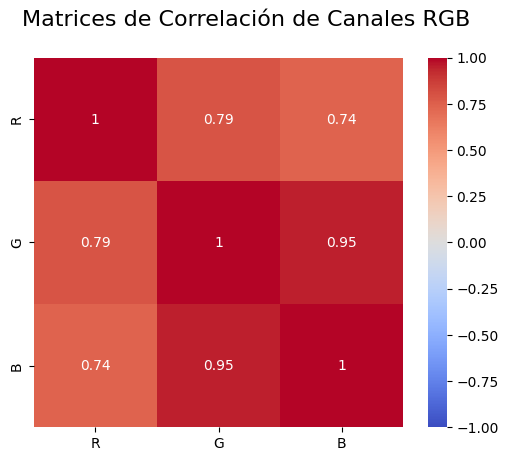

In [31]:
plt.suptitle("Matrices de Correlación de Canales RGB", fontsize=16)
sns.heatmap(m_t, annot=True, cmap="coolwarm", cbar=True, square=True,
                vmin=-1, vmax=1)

plt.show()

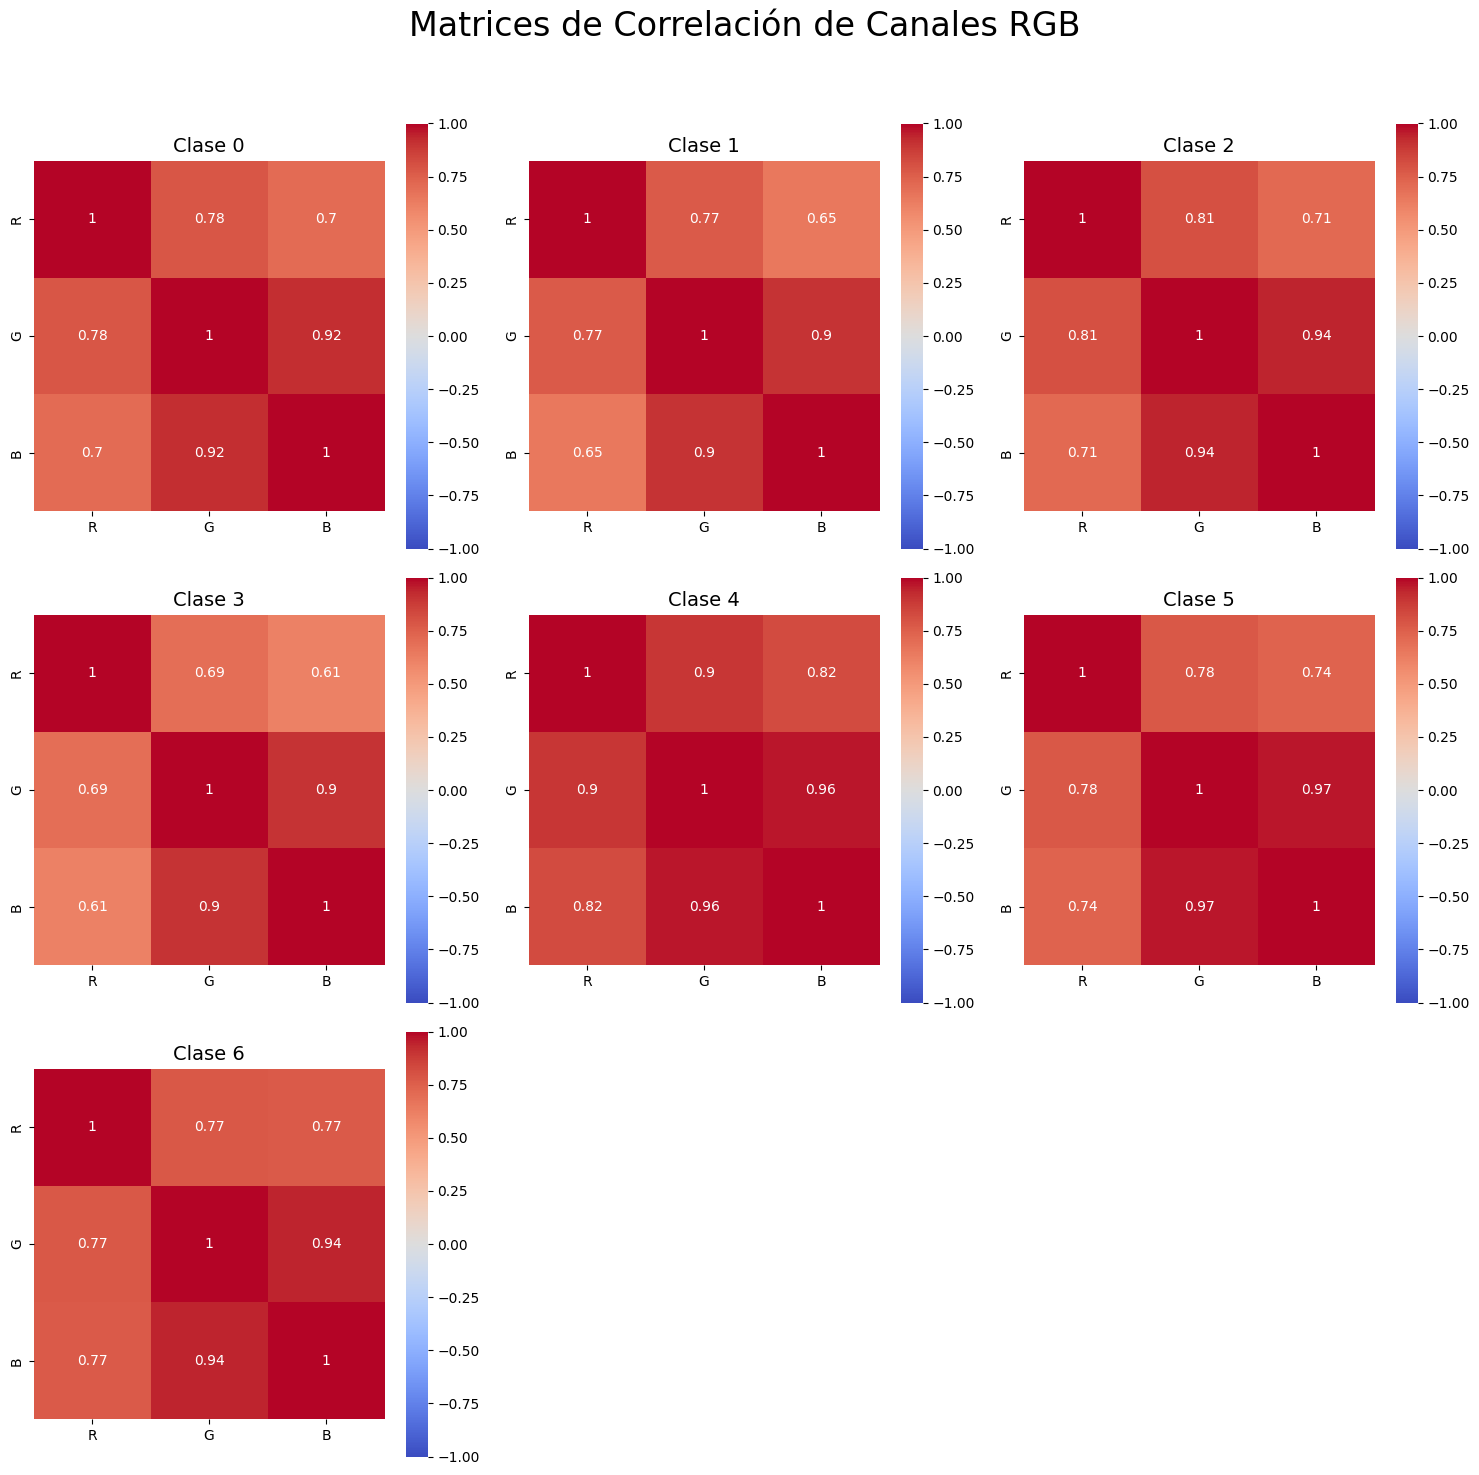

In [32]:
# Supongamos que tienes tus 6 matrices de correlación en una lista
matrices_correlacion = [m_0, m_1, m_2, m_3, m_4, m_5, m_6]

# Configurar la figura y las subplots en un layout de 3x2
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle("Matrices de Correlación de Canales RGB", fontsize=24)

# Graficar cada matriz de correlación
for i, matriz in enumerate(matrices_correlacion):
    ax = axes[i // 3, i % 3]  
    axes[2, 1].axis('off')  # Ocultar la celda [2, 1]
    axes[2, 2].axis('off')  # Ocultar la celda [2, 2]
    sns.heatmap(matriz, annot=True, cmap="coolwarm", ax=ax, cbar=True, square=True,
                vmin=-1, vmax=1)  # Ajusta los límites a [-1, 1] para correlación
    ax.set_title(f'Clase {i}', fontsize=14)



# Ajustar los espacios entre subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()